In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Plot different LAS difficulties

### 1. rollout/return

In [2]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
#-----------

import glob
# interval = ["point125","point25","point5","point75","one"]
# itv = interval[4]
itv = "ddpg"
csv_dir = "../SHARCNET/Results/Tensorboard_to_CSV/multi/aug_obs/"+itv+"/"
plot_save_dir = './plots_for_thesis/multi/aug_obs/'
if not os.path.exists(plot_save_dir):
    os.makedirs(plot_save_dir)
modes = ["SARA","PLA","Random"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(csv_dir+"run_"+ mode +"*.csv")
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 2 files found
../SHARCNET/Results/Tensorboard_to_CSV/multi/aug_obs/ddpg\run_SARA_2019-10-21-172629-0-20_1571693212gra702_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/multi/aug_obs/ddpg\run_SARA_2019-10-21-172632-1-20_1571693217gra703_file.csv
PLA: 2 files found
../SHARCNET/Results/Tensorboard_to_CSV/multi/aug_obs/ddpg\run_PLA_2019-10-21-172625-0-20_1571693210gra650_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/multi/aug_obs/ddpg\run_PLA_2019-10-21-172635-1-20_1571693221gra733_file.csv
Random: 0 files found


In [3]:
all_combined_data = dict()

for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file))
        
    # Random has no Q_mean records
    if mode == "Random":
        metrics = ["rollout/return"]
    else:
        metrics = ["rollout/return", "rollout/Q_mean"]
    
    mode_combined_data = pd.DataFrame()
    for metric in metrics:
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[metric+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[metric+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[metric+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

In [4]:
all_combined_data['SARA']

,rollout/return_run0,rollout/return_run1,rollout/return_avg,rollout/return_std,rollout/Q_mean_run0,rollout/Q_mean_run1,rollout/Q_mean_avg,rollout/Q_mean_std
0,17.004021,23.744833,20.374427,3.370406,-0.004994,-0.001433,-0.003213,0.001781
1,26.404659,25.025051,25.714855,0.689804,0.258967,0.394078,0.326522,0.067555
2,44.776772,24.583662,34.680217,10.096555,0.533213,0.638665,0.585939,0.052726
3,40.569775,26.158535,33.364155,7.205620,0.819778,0.834972,0.827375,0.007597
4,31.640585,26.446621,29.043603,2.596982,1.114814,1.009295,1.062054,0.052760
5,40.852417,25.314108,33.083262,7.769155,1.382155,1.172506,1.277330,0.104824
6,29.831038,49.478348,39.654693,9.823655,1.634839,1.313280,1.474060,0.160779
7,49.117016,46.512543,47.814779,1.302237,1.887297,1.486454,1.686875,0.200422
8,50.673744,32.751606,41.712675,8.961069,2.138941,1.720669,1.929805,0.209136
9,37.054024,47.058289,42.056156,5.002132,2.390881,1.951853,2.171367,0.219514


No handles with labels found to put in legend.


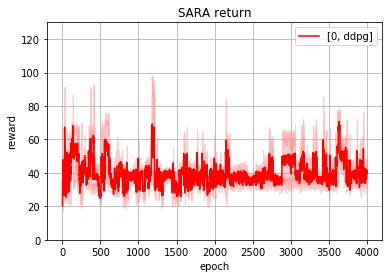

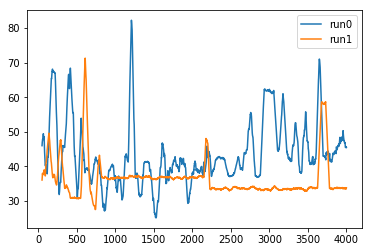

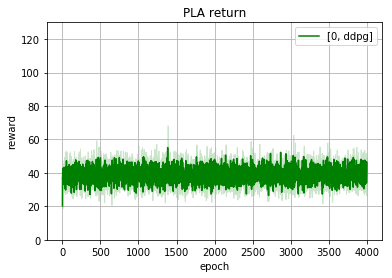

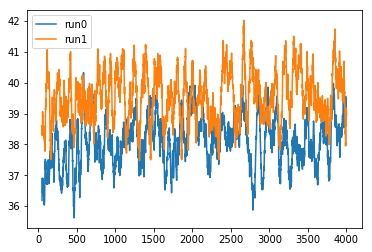

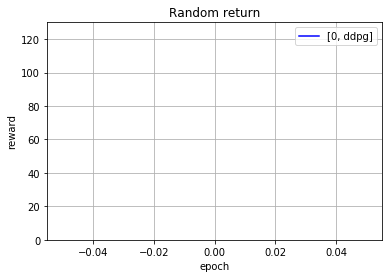

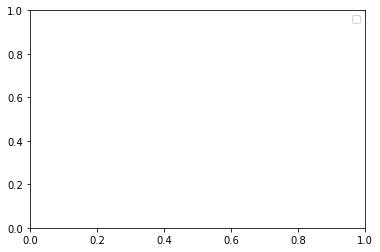

In [6]:
# Plot return
colors = ['r','g','b']
metric = "rollout/return"
me = metric.split('/')[1]
modes = ["SARA","PLA","Random"]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,length,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,length,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
    plt.ylim([0,130])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig(plot_save_dir+'{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')
    
    
    plt.figure()
    for j in range(len(all_data_files[mode])):
        plt.plot(np.linspace(1,length,length), data[metric+'_run{}'.format(j)].rolling(window=50).mean(), '-', label="run"+str(j))
    plt.legend(loc="best")


### 2.rollout/Q_mean

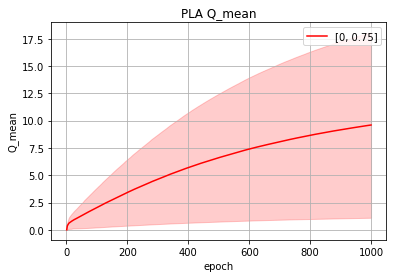

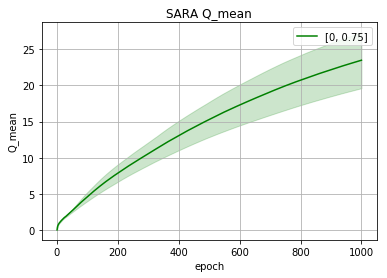

In [36]:
colors = ['r','g','b']
metric = "rollout/Q_mean"
modes = ["PLA","SARA"]
me = metric.split('/')[1]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,1000,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("Q_mean")
    plt.savefig(plot_save_dir+'{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')
    

---------------------

## Plot different visitor randomness

In [2]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
#-----------

import glob
# interval = ["point125","point25","point5","point75","one"]
interval = ["vzero","vpoint1","vpoint3"]
itv = interval[0]
# itv = "ddpg"
csv_dir = "../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/"+itv+"/"
plot_save_dir = './plots_for_thesis/multi/lazy_visitor_w_randomess/'
if not os.path.exists(plot_save_dir):
    os.makedirs(plot_save_dir)
modes = ["SARA","PLA","Random"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(csv_dir+"run_"+ mode +"*.csv")
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 4 files found
../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/vzero\run_SARA_2019-10-22-104810-1-8_1571755714gra1072_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/vzero\run_SARA_2019-10-22-104813-0-8_1571755717gra1045_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/vzero\run_SARA_2019-10-23-161112-1-8_1571861495gra742_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/vzero\run_SARA_2019-10-23-161114-0-9_1571861499gra701_file.csv
PLA: 4 files found
../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/vzero\run_PLA_2019-10-22-104812-0-8_1571755716gra1057_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/vzero\run_PLA_2019-10-22-104815-1-8_1571755722gra1063_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/multi/lazy_visitor_w_randomess/vzero\run_PLA_2019-10-23-161114-1-8_1571861498gra701_file.csv
../SHARCNET/Results/Tensorboa

In [3]:
all_combined_data = dict()

for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file))
        
    # Random has no Q_mean records
    if mode == "Random":
        metrics = ["rollout/return"]
    else:
        metrics = ["rollout/return", "rollout/Q_mean"]
    
    mode_combined_data = pd.DataFrame()
    for metric in metrics:
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[metric+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[metric+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[metric+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

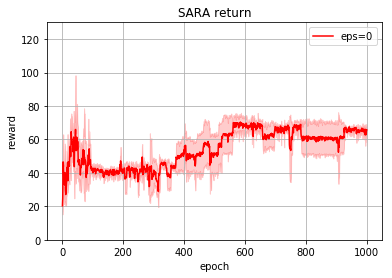

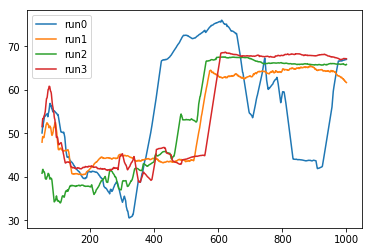

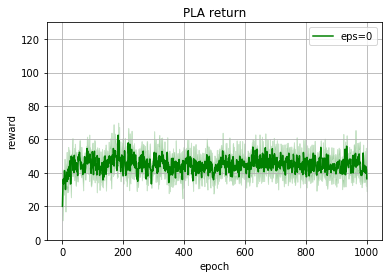

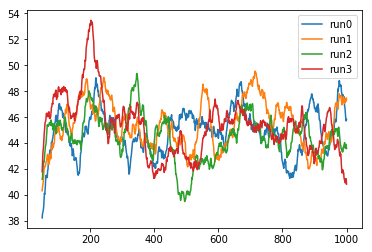

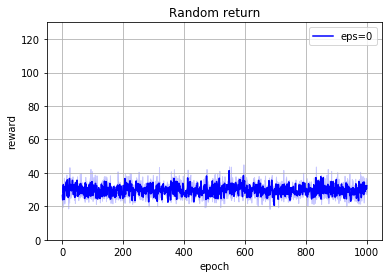

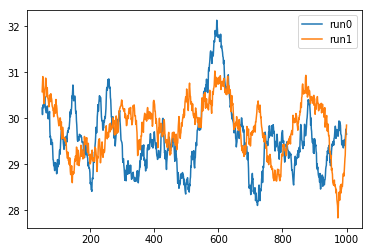

In [6]:
# Plot return
colors = ['r','g','b']
metric = "rollout/return"
me = metric.split('/')[1]
modes = ["SARA","PLA","Random"]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "eps="+itv.replace("vpoint","0.").replace("vzero","0")
    plt.fill_between(np.linspace(1,length,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,length,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
    plt.ylim([0,130])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig(plot_save_dir+'{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')
    
    
    plt.figure()
    for j in range(len(all_data_files[mode])):
        plt.plot(np.linspace(1,length,length), data[metric+'_run{}'.format(j)].rolling(window=50).mean(), '-', label="run"+str(j))
    plt.legend(loc="best")


In [12]:
plot_save_dir

'./plots_for_thesis/multi/lazy_visitor_w_randomess/'

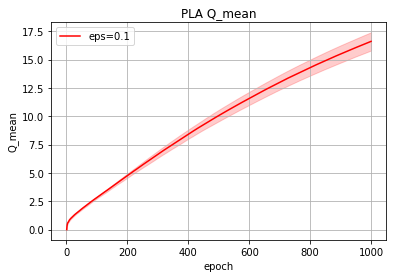

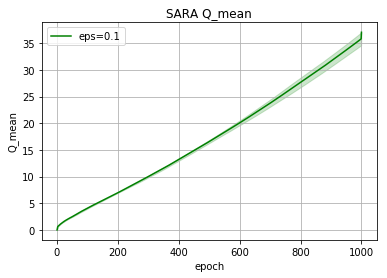

In [11]:
colors = ['r','g','b']
metric = "rollout/Q_mean"
modes = ["PLA","SARA"]
me = metric.split('/')[1]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "eps="+itv.replace("vpoint","0.")
    plt.fill_between(np.linspace(1,1000,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("Q_mean")
    plt.savefig(plot_save_dir+'{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')
    